In [ ]:
# from google.colab import drive
# drive.mount ('/content/drive/')

Mounted at /content/drive/


In [ ]:
import plotly.express as px
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_predict, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

# from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours as ENN

## SMOTE (Técnica de Oversampling Minoritário Sintético)
## 🧮 Classificação Ternário com Filtro
 - Oversampling
  - Seu objetivo é equilibrar a distribuição de classes, aumentando aleatoriamente os exemplos de classes minoritárias, replicando-os.


In [ ]:
df_path = '/dataset/nft_collections.csv' # este dataframe está com o filtro aplicado
df = pd.read_csv(df_path)

In [ ]:
# df['floor_price'].fillna(0, inplace=True)
# df = df.drop(['name_json','slug', 'count'], axis = 1)
# df['target'] = df['category'].apply(lambda x: 1 if x == 'art' else 0 if x == 'pfps' else 2)
# df.shape

(427788, 12)

#### 🔎 Aplicando Filtro
- Filtro -> (total_suply > 0) e (total_sales > 0)

In [ ]:
# mask = (df['total_supply'] > 0) & (df['total_sales'] > 0)

# # Aplicando a máscara para filtrar o DataFrame
# df = df[mask]
# df.shape

(40815, 12)

In [ ]:
# df['target'].value_counts()

1    19071
0    13831
2     7913
Name: target, dtype: int64

### 🧮 Usar metodologia de treino e teste (75% - 25%)

In [ ]:
y = df['target'] # ----> caracteristicas (1 = art / 0 = pfps / 2 = others)
X = df.drop(['target', 'category'],axis = 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42)

print("X_train dataset: ", X_train.shape)
print("y_train dataset: ", y_train.shape)
print("X_test dataset: ", X_test.shape)
print("y_test dataset: ", y_test.shape)

X_train dataset:  (30611, 10)
y_train dataset:  (30611,)
X_test dataset:  (10204, 10)
y_test dataset:  (10204,)


In [ ]:
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1' art: {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0' pfps: {}".format(sum(y_train_res == 0)))
print("After OverSampling, counts of label '2' others: {}".format(sum(y_train_res == 2)))

After OverSampling, the shape of train_X: (42696, 10)
After OverSampling, the shape of train_y: (42696,) 

After OverSampling, counts of label '1' art: 14232
After OverSampling, counts of label '0' pfps: 14232
After OverSampling, counts of label '2' others: 14232


### 🧮 Random Forest - Classificação Ternária ( 'art' x 'no art' x others ) com Oversampling (SMOTE)

In [ ]:
model = RandomForestClassifier(n_estimators=1000, min_samples_split=20, min_samples_leaf=15)
model.fit(X_train_res, y_train_res)

RandomForestClassifier(min_samples_leaf=15, min_samples_split=20,
                       n_estimators=1000)

In [ ]:
# Fazer previsões no conjunto de teste usando o melhor modelo
y_pred = model.predict(X_test)

# Calcular métricas de avaliação
acuracia = accuracy_score(y_test, y_pred)
precisao = precision_score(y_test, y_pred, average='weighted')  # Precisão ponderada por classe
revocacao = recall_score(y_test, y_pred, average='weighted')  # Revocação ponderada por classe
f1 = f1_score(y_test, y_pred, average='weighted')  # F1-Score ponderado por classe

# Exibir as métricas de avaliação
print("Acurácia:", acuracia)
print("Precisão:", precisao)
print("Revocação:", revocacao)
print("F1-Score:", f1)

Acurácia: 0.5737945903567229
Precisão: 0.5832778249655826
Revocação: 0.5737945903567229
F1-Score: 0.5778659319707797


In [ ]:
report = classification_report(y_test, y_pred)

# Exibir o relatório de classificação
print(report)

              precision    recall  f1-score   support

           0       0.64      0.61      0.62      3387
           1       0.64      0.62      0.63      4839
           2       0.35      0.41      0.38      1978

    accuracy                           0.57     10204
   macro avg       0.54      0.54      0.54     10204
weighted avg       0.58      0.57      0.58     10204



### 🧮 Matriz de confusão - Random Forest Classificação Ternária ( 'art' x 'no art' x 'others' )
 - Oversampling (SMOTE)

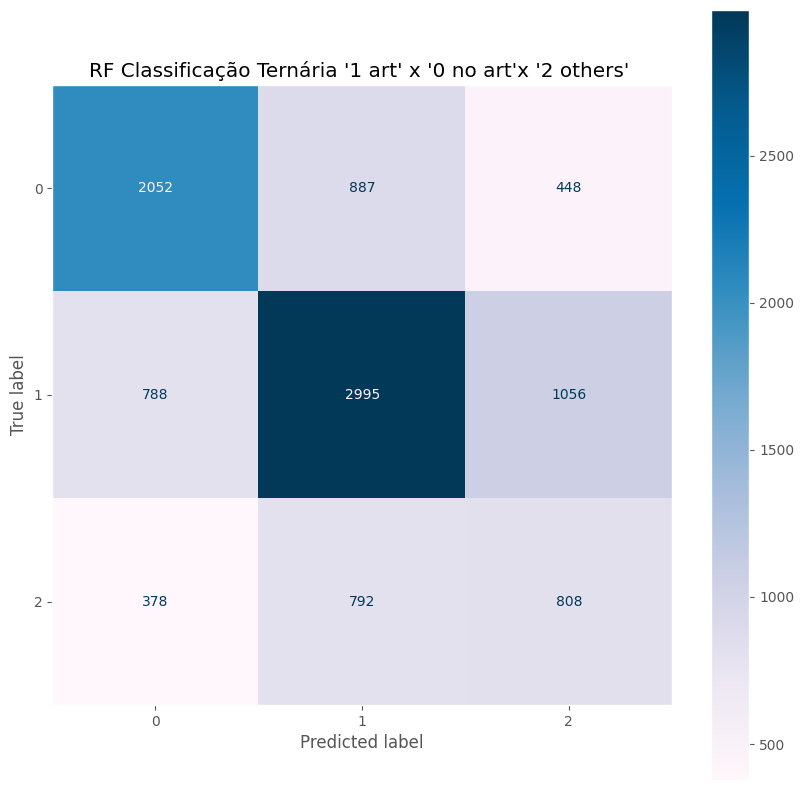

In [ ]:
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('ggplot')

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=np.unique(y_test))
cmap = 'PuBu'

disp.plot(cmap=cmap)
plt.title("RF Classificação Ternária '1 art' x '0 no art'x '2 others' ")
plt.grid(False)
plt.show()

### 🧮 Importância dos atributos - Random Forest Classificação Ternária (Art vs No Art vs Others)
- Oversampling (SMOTE)
- Com filtro

In [ ]:
# Obtenha a importância das features
importancia_features = model.feature_importances_

# Crie um DataFrame com as importâncias das features
df_importancia = pd.DataFrame({'Feature': X.columns, 'Importância': importancia_features})

# Ordene o DataFrame pela importância das features em ordem decrescente
df_importancia = df_importancia.sort_values(by='Importância', ascending=False)

# Exiba o DataFrame resultante
print(df_importancia)

         Feature  Importância
2   total_supply     0.228168
8     qtd_traits     0.170794
1    total_sales     0.130430
4  average_price     0.115411
3     num_owners     0.113373
0   total_volume     0.103570
7    floor_price     0.091963
6     market_cap     0.030738
9    qtd_editors     0.008446
5    num_reports     0.007106


## 🧮 Testando ENN - Classificação Ternária Undersampling com filtro
 - ENN (Edited Nearest Neighbours)
  - Enquanto o oversampling aumenta a quantidade de exemplos da classe minoritária, o undersampling faz o contrário: ele diminui a quantidade de exemplos da classe majoritária. Um dos métodos mais utilizados é chamado de ENN (Edited Nearest Neighbours)

In [ ]:
df_path = '/content/drive/MyDrive/top_Glauber/dataframe/dataset_v2.csv'
df = pd.read_csv(df_path)

df['floor_price'].fillna(0, inplace=True)
df = df.drop(['name_json','slug', 'count'], axis = 1)
df['target'] = df['category'].apply(lambda x: 1 if x == 'art' else 0 if x == 'pfps' else 2)

mask = (df['total_supply'] > 0) & (df['total_sales'] > 0)
# Aplicando a máscara para filtrar o DataFrame
df = df[mask]
print(f'shape: {df.shape}')
print(f"quantidade por categoria: \n{df['target'].value_counts()}")

shape: (40815, 12)
quantidade por categoria: 
1    19071
0    13831
2     7913
Name: target, dtype: int64


### 🧮 Usar metodologia de treino e teste (75% - 25%)

In [ ]:
y = df['target'] # ----> caracteristicas (1 = art / 0 = não art / 2 = others)
X = df.drop(['target', 'category'],axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42)

print("X_train dataset: ", X_train.shape)
print("y_train dataset: ", y_train.shape)
print("X_test dataset: ", X_test.shape)
print("y_test dataset: ", y_test.shape)

X_train dataset:  (30611, 10)
y_train dataset:  (30611,)
X_test dataset:  (10204, 10)
y_test dataset:  (10204,)


In [ ]:
enn = ENN()
X_train_res, y_train_res = enn.fit_resample(X_train, y_train.ravel())

print('After Undersampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After Undersampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After Undersampling, counts of label '1' art: {}".format(sum(y_train_res == 1)))
print("After Undersampling, counts of label '0' pfps: {}".format(sum(y_train_res == 0)))
print("After Undersampling, counts of label '2' others: {}".format(sum(y_train_res == 0)))

After Undersampling, the shape of train_X: (11078, 10)
After Undersampling, the shape of train_y: (11078,) 

After Undersampling, counts of label '1' art: 3015
After Undersampling, counts of label '0' pfps: 2128
After Undersampling, counts of label '2' others: 2128


### 🧮 Random Forest - Classificação ternária ( 'art' x 'pfps' x 'others') com ENN

In [ ]:
model = RandomForestClassifier(n_estimators=1000, min_samples_split=20, min_samples_leaf=15)
model.fit(X_train_res, y_train_res)

RandomForestClassifier(min_samples_leaf=15, min_samples_split=20,
                       n_estimators=1000)

In [ ]:
# Fazer previsões no conjunto de teste usando o melhor modelo
y_pred = model.predict(X_test)

# Calcular métricas de avaliação
acuracia = accuracy_score(y_test, y_pred)
precisao = precision_score(y_test, y_pred, average='weighted')  # Precisão ponderada por classe
revocacao = recall_score(y_test, y_pred, average='weighted')  # Revocação ponderada por classe
f1 = f1_score(y_test, y_pred, average='weighted')  # F1-Score ponderado por classe

# Exibir as métricas de avaliação
print("Acurácia:", acuracia)
print("Precisão:", precisao)
print("Revocação:", revocacao)
print("F1-Score:", f1)

Acurácia: 0.4161113288906311
Precisão: 0.6304906735499178
Revocação: 0.4161113288906311
F1-Score: 0.4345583500248785


In [ ]:
report = classification_report(y_test, y_pred)

# Exibir o relatório de classificação
print(report)

              precision    recall  f1-score   support

           0       0.77      0.37      0.50      3387
           1       0.69      0.30      0.42      4839
           2       0.24      0.79      0.37      1978

    accuracy                           0.42     10204
   macro avg       0.57      0.49      0.43     10204
weighted avg       0.63      0.42      0.44     10204



## SMOTE (Técnica de Oversampling Minoritário Sintético)
## 🧮 Classificação Ternário sem Filtro
 - Oversampling
  - Seu objetivo é equilibrar a distribuição de classes, aumentando aleatoriamente os exemplos de classes minoritárias, replicando-os.


In [ ]:
# df_path = '/content/drive/MyDrive/top_Glauber/dataframe/dataset_v2.csv'
df_path = '/content/drive/MyDrive/tópicos em computação - Glauber/dataframe/dataset_v2.csv'
df = pd.read_csv(df_path)

In [ ]:
df['floor_price'].fillna(0, inplace=True)
df = df.drop(['name_json','slug', 'count'], axis = 1)
df['target'] = df['category'].apply(lambda x: 1 if x == 'art' else 0 if x == 'pfps' else 2)
df.shape

(427788, 12)

In [ ]:
df['target'].value_counts()

1    247507
2    134983
0     45298
Name: target, dtype: int64

### 🧮 Usar metodologia de treino e teste (75% - 25%)

In [ ]:
y = df['target'] # ----> caracteristicas (1 = art / 0 = pfps / 2 = others)
X = df.drop(['target', 'category'],axis = 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42)

print("X_train dataset: ", X_train.shape)
print("y_train dataset: ", y_train.shape)
print("X_test dataset: ", X_test.shape)
print("y_test dataset: ", y_test.shape)

X_train dataset:  (320841, 10)
y_train dataset:  (320841,)
X_test dataset:  (106947, 10)
y_test dataset:  (106947,)


In [ ]:
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1' art: {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0' pfps: {}".format(sum(y_train_res == 0)))
print("After OverSampling, counts of label '2' others: {}".format(sum(y_train_res == 2)))

After OverSampling, the shape of train_X: (556812, 10)
After OverSampling, the shape of train_y: (556812,) 

After OverSampling, counts of label '1' art: 185604
After OverSampling, counts of label '0' pfps: 185604
After OverSampling, counts of label '2' others: 185604


### 🧮 Random Forest - Classificação Ternária ( 'art' x 'pfps' x others ) com Oversampling (SMOTE)

In [ ]:
model = RandomForestClassifier(n_estimators=1000, min_samples_split=20, min_samples_leaf=15)
model.fit(X_train_res, y_train_res)

RandomForestClassifier(min_samples_leaf=15, min_samples_split=20,
                       n_estimators=1000)

In [ ]:
# Fazer previsões no conjunto de teste usando o melhor modelo
y_pred = model.predict(X_test)

# Calcular métricas de avaliação
acuracia = accuracy_score(y_test, y_pred)
precisao = precision_score(y_test, y_pred, average='weighted')  # Precisão ponderada por classe
revocacao = recall_score(y_test, y_pred, average='weighted')  # Revocação ponderada por classe
f1 = f1_score(y_test, y_pred, average='weighted')  # F1-Score ponderado por classe

# Exibir as métricas de avaliação
print("Acurácia:", acuracia)
print("Precisão:", precisao)
print("Revocação:", revocacao)
print("F1-Score:", f1)

Acurácia: 0.6358476628610433
Precisão: 0.6530993011354117
Revocação: 0.6358476628610433
F1-Score: 0.6415558231462707


In [ ]:
report = classification_report(y_test, y_pred)

# Exibir o relatório de classificação
print(report)

              precision    recall  f1-score   support

           0       0.30      0.45      0.36     11380
           1       0.72      0.72      0.72     61903
           2       0.65      0.54      0.59     33664

    accuracy                           0.64    106947
   macro avg       0.56      0.57      0.56    106947
weighted avg       0.65      0.64      0.64    106947



### 🧮 Matriz de confusão - Random Forest Classificação Ternária ( 'art' x 'pfps'x 'others' )
 - Oversampling (SMOTE)
 - Sem filtro

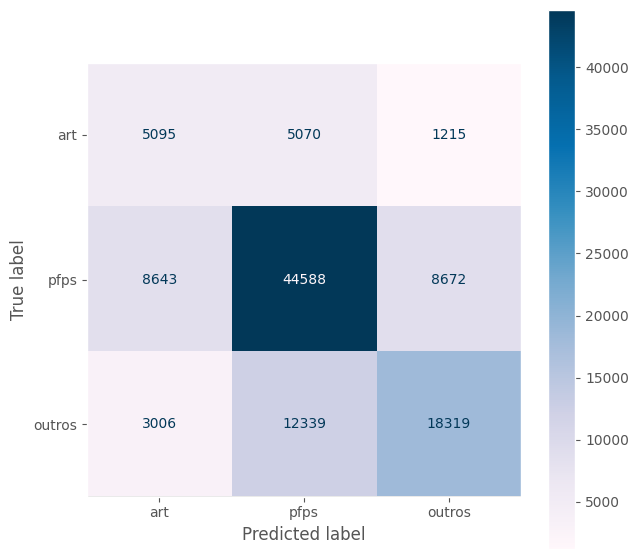

In [ ]:
plt.rcParams['figure.figsize'] = (7, 7)
plt.style.use('ggplot')

category = ['art', 'pfps', 'outros']
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=category)
cmap = 'PuBu'

disp.plot(cmap=cmap)
# plt.title("RF Classificação Ternária")
plt.grid(False)
plt.show()

### 🧮 Importância dos atributos - Random Forest Classificação Ternária (Art vs No Art vs Others)
- Oversampling (SMOTE)
- Sem filtro

In [ ]:
# Obtenha a importância das features
importancia_features = model.feature_importances_

# Crie um DataFrame com as importâncias das features
df_importancia = pd.DataFrame({'Feature': X.columns, 'Importância': importancia_features})

# Ordene o DataFrame pela importância das features em ordem decrescente
df_importancia = df_importancia.sort_values(by='Importância', ascending=False)

# Exiba o DataFrame resultante
print(df_importancia)

         Feature  Importância
2   total_supply     0.372539
3     num_owners     0.229592
0   total_volume     0.080628
4  average_price     0.079188
7    floor_price     0.078529
8     qtd_traits     0.074980
1    total_sales     0.071936
9    qtd_editors     0.008801
6     market_cap     0.003636
5    num_reports     0.000171


## 🧮 Testando ENN - Classificação Ternária Undersampling
 - ENN (Edited Nearest Neighbours)
  - Enquanto o oversampling aumenta a quantidade de exemplos da classe minoritária, o undersampling faz o contrário: ele diminui a quantidade de exemplos da classe majoritária. Um dos métodos mais utilizados é chamado de ENN (Edited Nearest Neighbours)

In [ ]:
df_path = '/content/drive/MyDrive/top_Glauber/dataframe/dataset_v2.csv'
df = pd.read_csv(df_path)

df['floor_price'].fillna(0, inplace=True)
df = df.drop(['name_json','slug', 'count'], axis = 1)
df['target'] = df['category'].apply(lambda x: 1 if x == 'art' else 0 if x == 'pfps' else 2)

print(f'shape: {df.shape}')
print(f"quantidade por categoria: \n{df['target'].value_counts()}")

shape: (427788, 12)
quantidade por categoria: 
1    247507
2    134983
0     45298
Name: target, dtype: int64


### 🧮 Usar metodologia de treino e teste (75% - 25%)

In [ ]:
y = df['target'] # ----> caracteristicas (1 = art / 0 = pfps / 2 = others)
X = df.drop(['target', 'category'],axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42)

print("X_train dataset: ", X_train.shape)
print("y_train dataset: ", y_train.shape)
print("X_test dataset: ", X_test.shape)
print("y_test dataset: ", y_test.shape)

X_train dataset:  (320841, 10)
y_train dataset:  (320841,)
X_test dataset:  (106947, 10)
y_test dataset:  (106947,)


In [ ]:
enn = ENN()
X_train_res, y_train_res = enn.fit_resample(X_train, y_train.ravel())

print('After Undersampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After Undersampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After Undersampling, counts of label '1' art: {}".format(sum(y_train_res == 1)))
print("After Undersampling, counts of label '0' pfps: {}".format(sum(y_train_res == 0)))
print("After Undersampling, counts of label '2' others: {}".format(sum(y_train_res == 0)))

After Undersampling, the shape of train_X: (82445, 10)
After Undersampling, the shape of train_y: (82445,) 

After Undersampling, counts of label '1' art: 47610
After Undersampling, counts of label '0' pfps: 33918
After Undersampling, counts of label '2' others: 33918


In [ ]:
y = df['target'] # ----> caracteristicas (1 = art / 0 = não art / 2 = others)
X = df.drop(['target', 'category'],axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42)

print("X_train dataset: ", X_train.shape)
print("y_train dataset: ", y_train.shape)
print("X_test dataset: ", X_test.shape)
print("y_test dataset: ", y_test.shape)

X_train dataset:  (320841, 10)
y_train dataset:  (320841,)
X_test dataset:  (106947, 10)
y_test dataset:  (106947,)


In [ ]:
enn = ENN()
X_train_res, y_train_res = enn.fit_resample(X_train, y_train.ravel())

print('After Undersampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After Undersampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After Undersampling, counts of label '1' art: {}".format(sum(y_train_res == 1)))
print("After Undersampling, counts of label '0' pfps: {}".format(sum(y_train_res == 0)))
print("After Undersampling, counts of label '2' others: {}".format(sum(y_train_res == 0)))

After Undersampling, the shape of train_X: (82445, 10)
After Undersampling, the shape of train_y: (82445,) 

After Undersampling, counts of label '1' art: 47610
After Undersampling, counts of label '0' pfps: 33918
After Undersampling, counts of label '2' others: 33918


### 🧮 Random Forest - Classificação binária ( 'art' x 'no art' x 'others' ) com ENN

In [ ]:
model = RandomForestClassifier(n_estimators=1000, min_samples_split=20, min_samples_leaf=15)
model.fit(X_train_res, y_train_res)

RandomForestClassifier(min_samples_leaf=15, min_samples_split=20,
                       n_estimators=1000)

In [ ]:
# Fazer previsões no conjunto de teste usando o melhor modelo
y_pred = model.predict(X_test)

# Calcular métricas de avaliação
acuracia = accuracy_score(y_test, y_pred)
precisao = precision_score(y_test, y_pred, average='weighted')  # Precisão ponderada por classe
revocacao = recall_score(y_test, y_pred, average='weighted')  # Revocação ponderada por classe
f1 = f1_score(y_test, y_pred, average='weighted')  # F1-Score ponderado por classe

# Exibir as métricas de avaliação
print("Acurácia:", acuracia)
print("Precisão:", precisao)
print("Revocação:", revocacao)
print("F1-Score:", f1)

In [ ]:
report = classification_report(y_test, y_pred)

# Exibir o relatório de classificação
print(report)

              precision    recall  f1-score   support

           0       0.11      0.64      0.19     11380
           1       0.71      0.46      0.56     61903
           2       0.79      0.00      0.00     33664

    accuracy                           0.33    106947
   macro avg       0.53      0.37      0.25    106947
weighted avg       0.67      0.33      0.34    106947



### 🧮 Matriz de confusão - Random Forest Classificação Ternária ( 'art' x 'no art'x 'others' )
 - Undersampling (ENN)
 - Sem filtro

In [ ]:
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('ggplot')

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=np.unique(y_test))
cmap = 'PuBu'

disp.plot(cmap=cmap)
plt.title("RF Classificação Ternária '1 art' x '0 no art'x '2 others' ")
plt.grid(False)
plt.show()

### 🧮 Importância dos atributos - Random Forest Classificação Ternária (Art vs No Art vs Others)
- Undersampling (ENN)
- Sem filtro

In [ ]:
# Obtenha a importância das features
importancia_features = model.feature_importances_

# Crie um DataFrame com as importâncias das features
df_importancia = pd.DataFrame({'Feature': X.columns, 'Importância': importancia_features})

# Ordene o DataFrame pela importância das features em ordem decrescente
df_importancia = df_importancia.sort_values(by='Importância', ascending=False)

# Exiba o DataFrame resultante
print(df_importancia)

         Feature  Importância
2   total_supply     0.439970
3     num_owners     0.200029
8     qtd_traits     0.108512
7    floor_price     0.083469
1    total_sales     0.076990
0   total_volume     0.049196
4  average_price     0.035603
9    qtd_editors     0.004334
6     market_cap     0.001224
5    num_reports     0.000672


### RF Sem SMOTE e ENN

In [ ]:
df_path = '/content/drive/MyDrive/top_Glauber/dataframe/dataset_v2.csv'
df = pd.read_csv(df_path)

In [ ]:
df['floor_price'].fillna(0, inplace=True)
df = df.drop(['name_json','slug', 'count'], axis = 1)
df['target'] = df['category'].apply(lambda x: 1 if x == 'art' else 0 if x == 'pfps' else 2)

# Filtro
mask = (df['total_supply'] > 0) & (df['total_sales'] > 0)
# Aplicando a máscara para filtrar o DataFrame
df = df[mask]

df.shape

(40815, 12)

In [ ]:
df['target'].value_counts()

1    19071
0    13831
2     7913
Name: target, dtype: int64

In [ ]:
y = df['target'] # ----> caracteristicas (1 = art / 0 = pfps / 2 = others)
X = df.drop(['target', 'category'],axis = 1)

In [ ]:
y = df['target'] # ----> caracteristicas (1 = art / 0 = não art / 2 = others)
X = df.drop(['target', 'category'],axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42)

print("X_train dataset: ", X_train.shape)
print("y_train dataset: ", y_train.shape)
print("X_test dataset: ", X_test.shape)
print("y_test dataset: ", y_test.shape)

X_train dataset:  (30611, 10)
y_train dataset:  (30611,)
X_test dataset:  (10204, 10)
y_test dataset:  (10204,)


In [ ]:
model = RandomForestClassifier(n_estimators=1000, min_samples_split=20, min_samples_leaf=15)
model.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=15, min_samples_split=20,
                       n_estimators=1000)

In [ ]:
# Fazer previsões no conjunto de teste usando o melhor modelo
y_pred = model.predict(X_test)

# Calcular métricas de avaliação
acuracia = accuracy_score(y_test, y_pred)
precisao = precision_score(y_test, y_pred, average='weighted')  # Precisão ponderada por classe
revocacao = recall_score(y_test, y_pred, average='weighted')  # Revocação ponderada por classe
f1 = f1_score(y_test, y_pred, average='weighted')  # F1-Score ponderado por classe

# Exibir as métricas de avaliação
print("Acurácia:", acuracia)
print("Precisão:", precisao)
print("Revocação:", revocacao)
print("F1-Score:", f1)

Acurácia: 0.617796942375539
Precisão: 0.6114085635591411
Revocação: 0.617796942375539
F1-Score: 0.5810387318780905


In [ ]:
report = classification_report(y_test, y_pred)

# Exibir o relatório de classificação
print(report)

              precision    recall  f1-score   support

           0       0.66      0.59      0.62      3387
           1       0.61      0.84      0.70      4839
           2       0.55      0.14      0.22      1978

    accuracy                           0.62     10204
   macro avg       0.60      0.52      0.51     10204
weighted avg       0.61      0.62      0.58     10204

